# Regression : Cities_Magicbrick_rental_price

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### EDA

In [5]:
data=pd.read_csv('data/cities_magicbricks_rental_prices.csv')

In [7]:
data.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0


In [11]:
data.describe()

,area,beds,bathrooms,balconies,area_rate,rent
count,7691.000000,7691.000000,7691.000000,7691.000000,7691.000000,7.691000e+03
mean,1106.354180,2.208685,2.137043,0.817319,47.619989,5.479508e+04
std,1197.426843,0.993481,1.027677,1.243361,68.989657,9.742006e+04
min,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000e+03
25%,600.000000,1.000000,1.000000,0.000000,21.000000,1.500000e+04
50%,900.000000,2.000000,2.000000,0.000000,31.000000,2.800000e+04
75%,1300.000000,3.000000,3.000000,2.000000,54.000000,5.700000e+04
max,70000.000000,10.000000,10.000000,10.000000,2586.000000,2.700000e+06


In [13]:
data.isna().sum()

house_type    0
locality      0
city          0
area          0
beds          0
bathrooms     0
balconies     0
furnishing    0
area_rate     0
rent          0
dtype: int64

In [15]:
data.duplicated().sum()

0

In [17]:
data.dtypes

house_type     object
locality       object
city           object
area          float64
beds            int64
bathrooms       int64
balconies       int64
furnishing     object
area_rate     float64
rent          float64
dtype: object

In [21]:
# Label Encoding
label_encoders = {}
for col in ['house_type', 'locality', 'city', 'furnishing']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [23]:
data.dtypes

house_type      int32
locality        int32
city            int32
area          float64
beds            int64
bathrooms       int64
balconies       int64
furnishing      int32
area_rate     float64
rent          float64
dtype: object

In [25]:
data.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,2428,585,1,897.0,2,2,0,1,134.0,120000.0
1,706,1389,1,490.0,1,1,0,1,82.0,40000.0
2,1214,1179,4,550.0,1,1,0,2,22.0,12000.0
3,1944,670,2,1000.0,2,2,0,2,8.0,8000.0
4,837,1146,1,595.0,1,1,0,2,25.0,15000.0


In [27]:
data.corr()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
house_type,1.000000,0.096824,-0.135795,0.469803,0.904097,0.771116,0.374600,-0.095254,0.072534,0.386422
locality,0.096824,1.000000,0.094312,-0.011015,-0.018327,-0.024606,0.005253,0.016716,-0.027965,-0.015245
city,-0.135795,0.094312,1.000000,-0.125663,-0.131277,-0.163518,0.004278,0.093305,-0.145132,-0.171352
area,0.469803,-0.011015,-0.125663,1.000000,0.516329,0.535668,0.296145,-0.090037,0.022209,0.433513
beds,0.904097,-0.018327,-0.131277,0.516329,1.000000,0.850310,0.418587,-0.118684,0.111820,0.473695
bathrooms,0.771116,-0.024606,-0.163518,0.535668,0.850310,1.000000,0.442145,-0.130125,0.160051,0.532681
balconies,0.374600,0.005253,0.004278,0.296145,0.418587,0.442145,1.000000,-0.042480,-0.004592,0.179181
furnishing,-0.095254,0.016716,0.093305,-0.090037,-0.118684,-0.130125,-0.042480,1.000000,-0.086916,-0.124648
area_rate,0.072534,-0.027965,-0.145132,0.022209,0.111820,0.160051,-0.004592,-0.086916,1.000000,0.507104
rent,0.386422,-0.015245,-0.171352,0.433513,0.473695,0.532681,0.179181,-0.124648,0.507104,1.000000


### Outlier handling

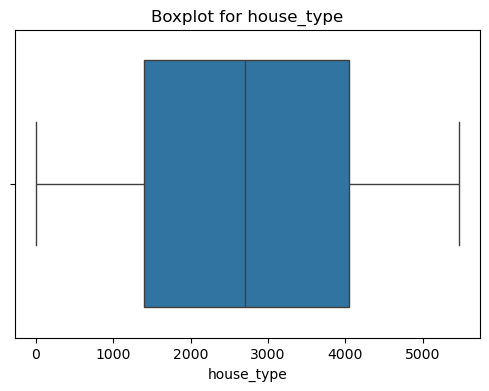

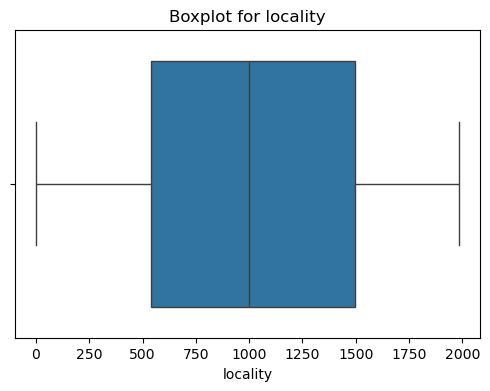

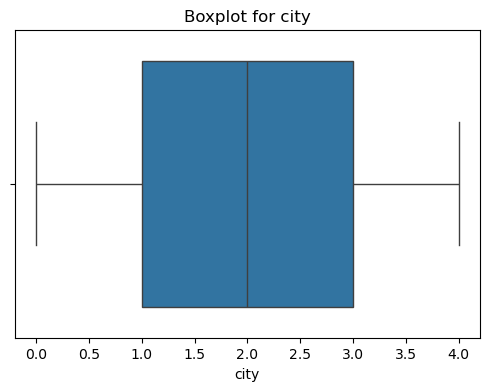

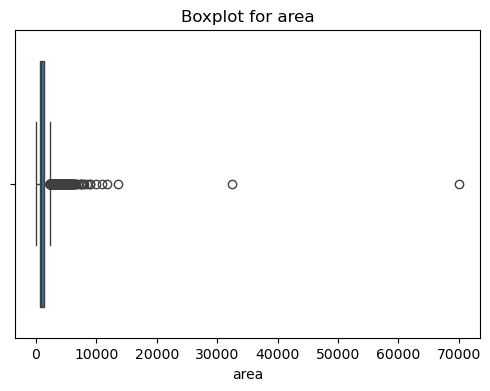

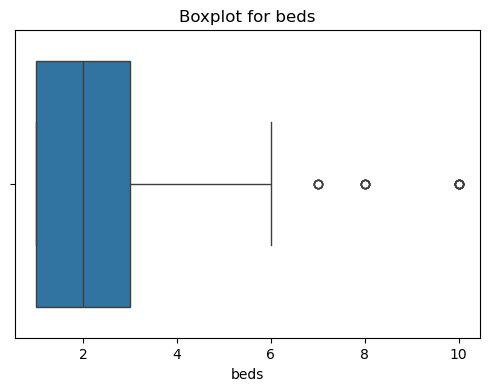

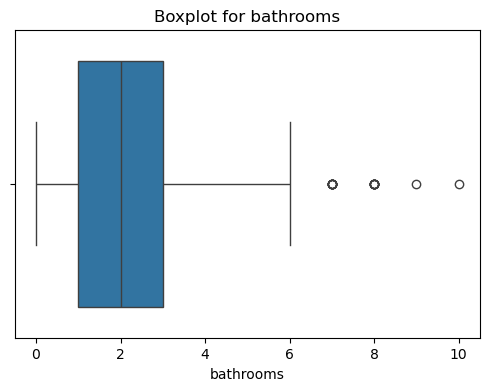

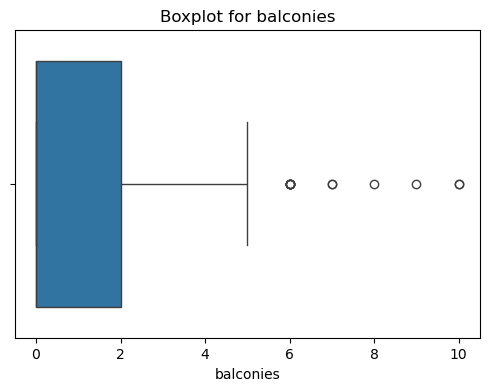

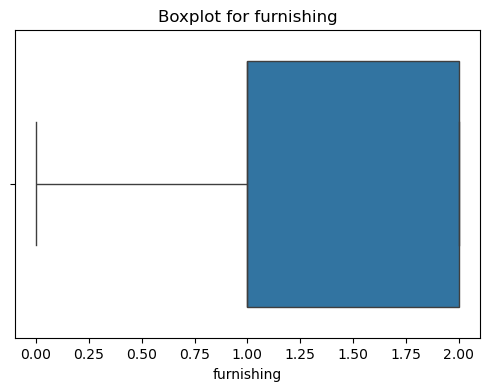

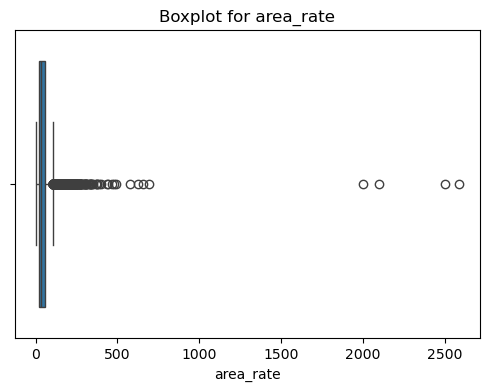

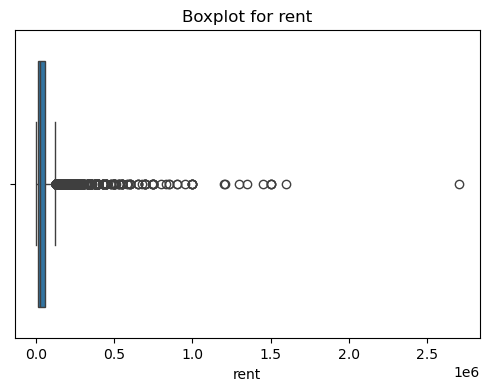

In [30]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [32]:
def handle_outliers_clip(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)    
    return df

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

   house_type  locality  city    area  beds  bathrooms  balconies  furnishing  \
0        2428       585     1   897.0     2          2          0           1   
1         706      1389     1   490.0     1          1          0           1   
2        1214      1179     4   550.0     1          1          0           2   
3        1944       670     2  1000.0     2          2          0           2   
4         837      1146     1   595.0     1          1          0           2   

   area_rate      rent  
0      103.5  120000.0  
1       82.0   40000.0  
2       22.0   12000.0  
3        8.0    8000.0  
4       25.0   15000.0  


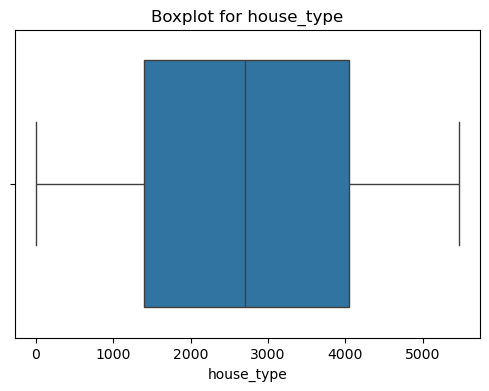

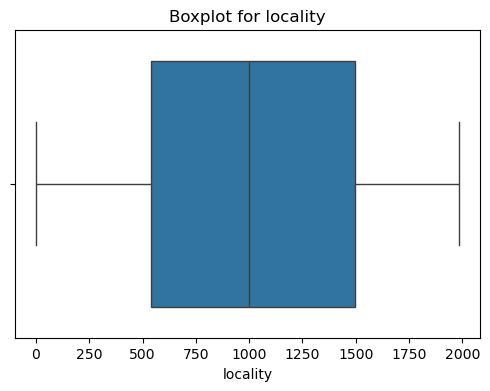

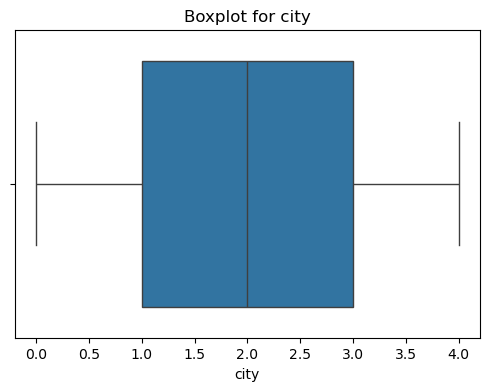

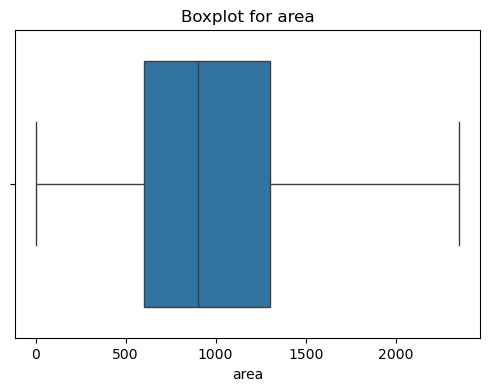

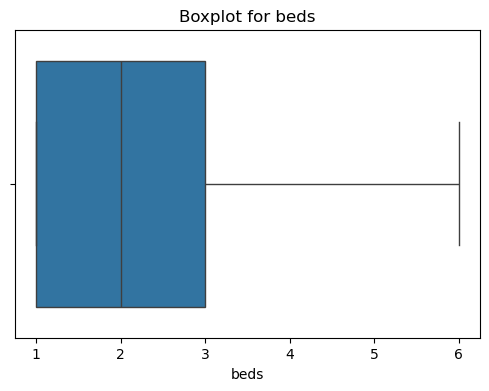

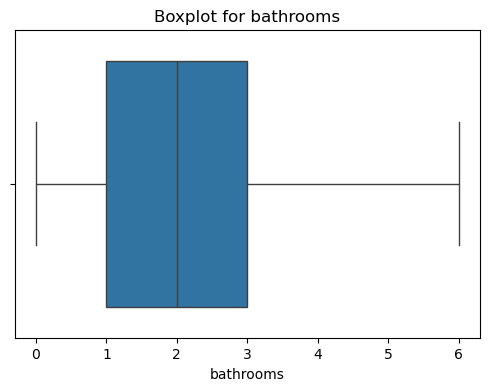

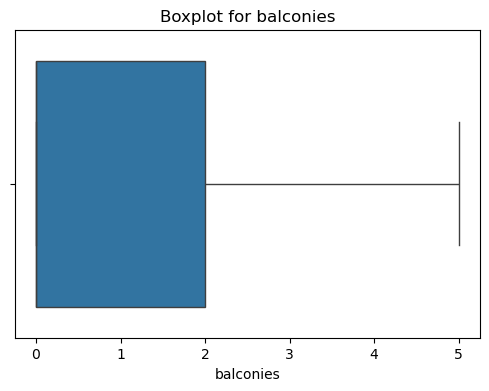

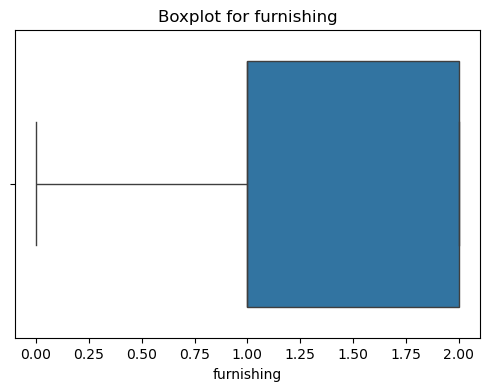

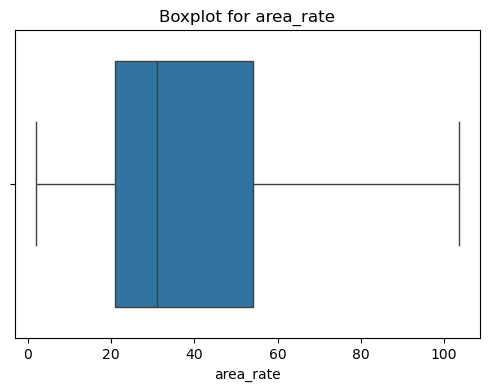

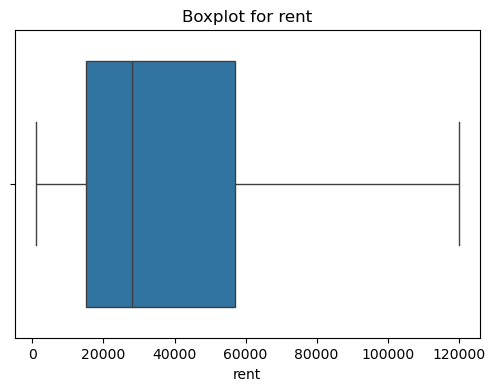

In [34]:
# checking if outliers still exist
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

### Splitting data

In [37]:
X = data.drop(columns=['rent'])
y = data['rent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling

In [40]:
regressors = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=47, random_state=34),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42, max_depth=5),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='linear')
}

for name, reg in regressors.items():
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # print(f'{name} Mean Squared Error: {mse:.2f}')
    print(f'{name} R^2 Score: {r2:.2f}\n')

Linear Regression R^2 Score: 0.89

Random Forest Regressor R^2 Score: 0.97

Decision Tree Regressor R^2 Score: 0.93

KNN Regressor R^2 Score: 0.91

SVR R^2 Score: 0.37



In [42]:
#END